In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [7]:
df_labels = pd.read_csv('csvjoinv2/atlanta.join.node.csv', low_memory=False)
df_features = pd.read_csv('../../network_specs/atlanta.specs.csv', sep=';')

#df_features.drop(columns='state', inplace=True)
df_labels.head(5)

,Id,State
0,11,Recovered
1,2,Recovered
2,14,Recovered
3,5,Recovered
4,6,Recovered


In [8]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [9]:
df_labels['State'].value_counts()

0    318395
1      1615
Name: State, dtype: int64

In [10]:
df_labels['Id'].value_counts()

11    21334
2     21334
14    21334
5     21334
6     21334
3     21334
1     21334
12    21334
7     21334
9     21334
8     21334
10    21334
4     21334
13    21334
0     21334
Name: Id, dtype: int64

In [11]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,0,0.000000
1,1,0.000609
2,2,0.000187
3,3,0.002953
4,4,0.008625
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000797
9,9,0.000609


In [12]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [13]:
df_data['binary_state'] = df_data['State'] > 0.0

In [14]:
folder = './jsonDataReport'
roundData = {}

files = os.listdir(folder)
for fname in files:    
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)  
        node_nneigh = []
        for node_id, node_data in data['0'].items():
            node_data_small = {
                'Id': node_id,
                'nneighWithNodeInfo': node_data['nneighWithNodeInfo']
            }
            node_nneigh.append(node_data_small)
        df_nneigh = pd.DataFrame(node_nneigh)  
        break
        
df_nneigh.head() #nneighWithNodeInfo

,Id,nneighWithNodeInfo
0,11,6
1,12,8
2,13,7
3,14,7
4,0,12


In [15]:
df_data['Id'] = df_data['Id'].astype(str)
df_data = df_data.merge(df_nneigh, on='Id', how='left')

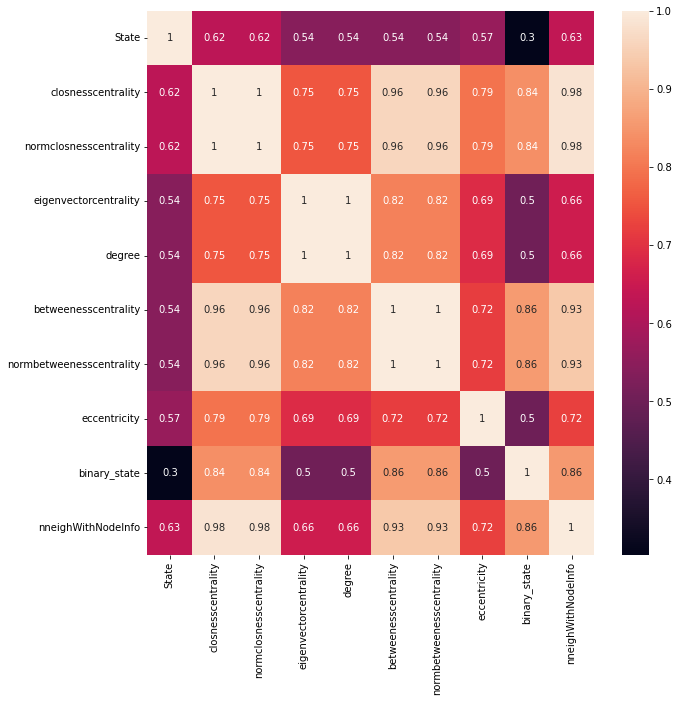

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

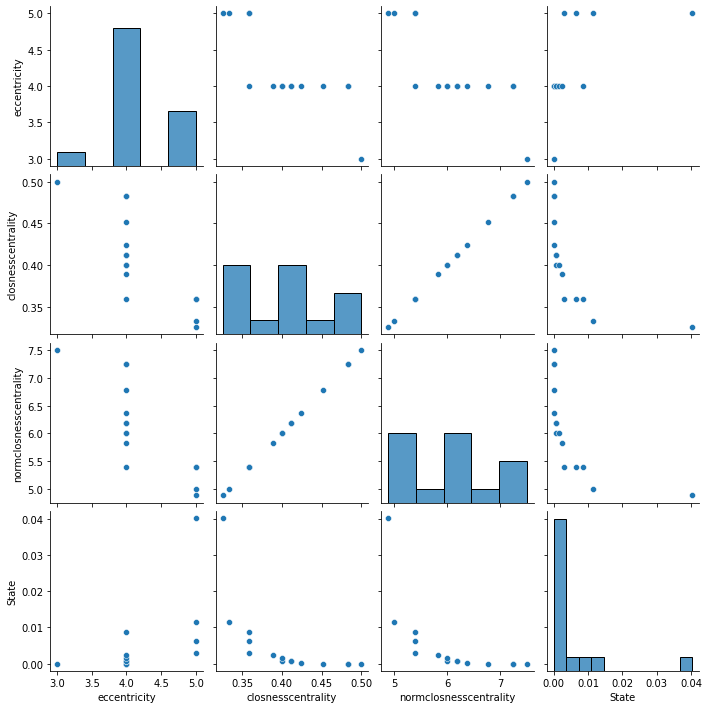

In [17]:
sns.pairplot(
    data=df_data[
        ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality',
         'State'
        ]
    ]
)

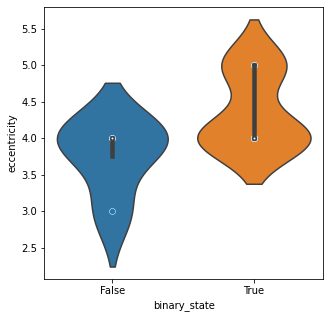

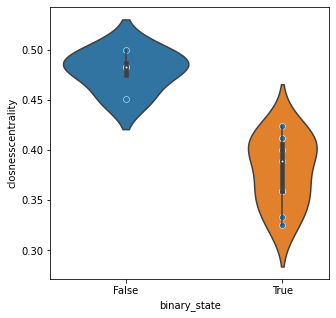

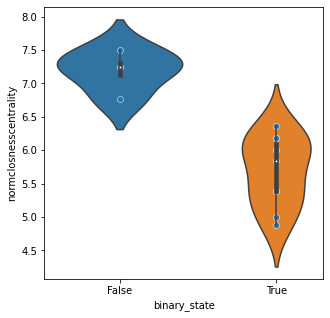

In [18]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

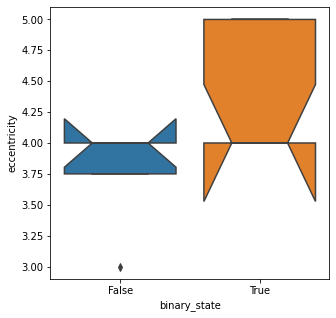

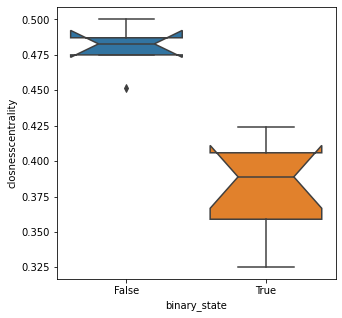

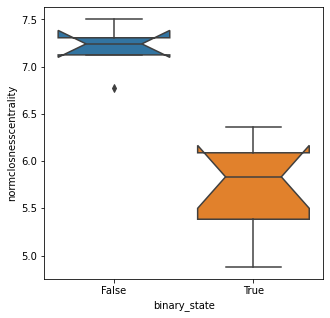

In [19]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()

In [20]:
joined_result_folder = '../joined_boxplot'

if not os.path.exists(joined_result_folder):
    os.mkdir(joined_result_folder)
    
df_data.to_pickle(f'{joined_result_folder}/atlanta.pkl')

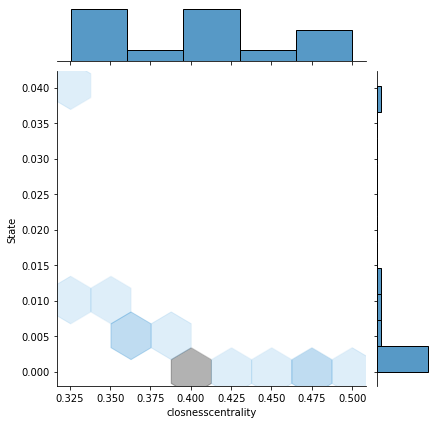

In [21]:
sns.jointplot(
    data=df_data,
    x='closnesscentrality',
    y='State',
   # hue='binary_state',
    alpha=0.3,
    kind="hex"
    #kind="reg",
     #logx=True
)
    